In [20]:
import sys
sys.path.append("../")
import torch 
import numpy as np
from spins.fdfd_tools.waveguide_mode import solve_waveguide_mode, compute_source, compute_overlap_e
from src.utils.physics import residue_E, eps_to_yee
from src.utils.PML_utils import make_dxes_numpy
from src.utils.plot_field3D import plot_3slices
import src.utils.waveguide_mode as modes
# import Direction, axisvec2polarity, axisvec2axis

import matplotlib.pyplot as plt
import copy


In [13]:
def make_straight_wg(shape, wg_eps, sub_eps, wg_thickness, wg_height):
    eps = np.ones(shape)
    j_start = eps.shape[1]//2 - wg_thickness//2
    j_end = eps.shape[1]//2 + wg_thickness//2
    k_start = eps.shape[2]//2 - wg_height//2
    k_end = eps.shape[2]//2 + wg_height//2
    eps[:,j_start:j_end,k_start:k_end] = wg_eps
    eps[:,:,:k_start] = sub_eps
    return eps

In [28]:
wl = 800
dL = 20
full_shape = (64,64,64)
wg_eps = 8
sub_eps = 2.25
wg_thickness = 16
wg_height = 16
pmls = [10,10,10,10,10,10]

In [25]:
eps = make_straight_wg(full_shape, wg_eps, sub_eps, wg_thickness, wg_height)

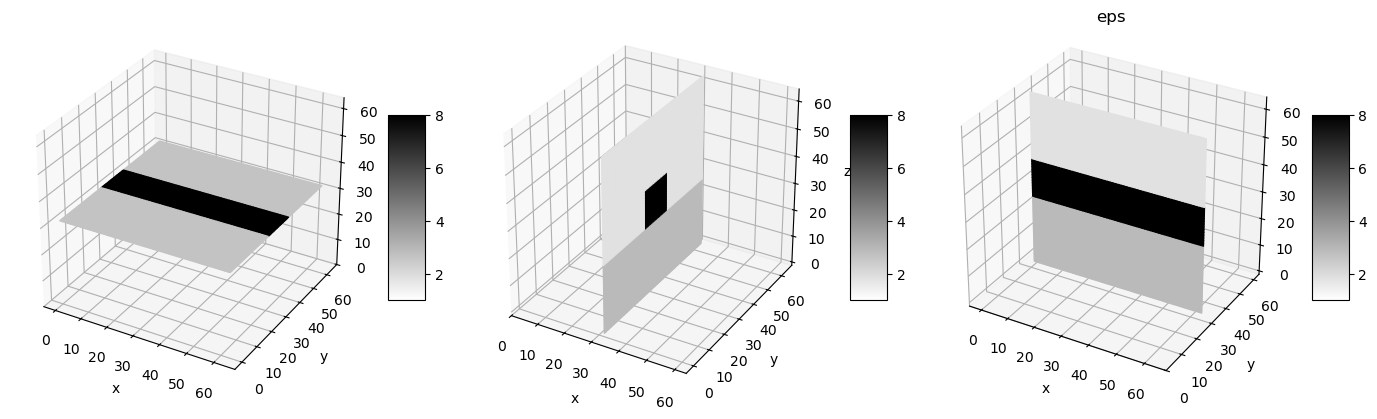

In [19]:
fig1 = plot_3slices(eps, fname=None, my_cmap=plt.cm.binary, cm_zero_center=False, title="eps")

In [32]:
_ports = []

# soruce port:
port_x = pmls[0] + 5
port_y = eps.shape[1]//2
port_z = eps.shape[2]//2
wg_mode_padding = 10
width = wg_thickness + 2*wg_mode_padding
height = wg_height + 2*wg_mode_padding
order = 0
axis_vector = [1,0,0]
offset = 3

_ports.append(
    modes.WaveguidePort(
        x=port_x,
        y=port_y,
        z=port_z,
        width=width,
        height=height,
        order=order,
        axis_vector=axis_vector,
        offset=offset # constant doesn't depend no location
    )    
)

_ports[0].precompute_mode(
    wavelengths=[wl],
    dL=dL,
    epsilon_r=eps,
    pml_layers=pmls,
    power=1,
    ln_R=-10,
    precompute_source=True
)

port_x2 = eps.shape[0] - pmls[1] - 5

_ports.append(
    modes.WaveguidePort(
        x=port_x2,
        y=port_y,
        z=port_z,
        width=width,
        height=height,
        order=order,
        axis_vector=[-i for i in axis_vector],
        offset=offset # constant doesn't depend no location
    )    
)

_ports[1].precompute_mode(
    wavelengths=[wl],
    dL=dL,
    epsilon_r=eps,
    pml_layers=pmls,
    power=1,
    ln_R=-10,
    precompute_source=True
)

polarity:  1
precomputing source for wavelength:  800
polarity:  -1
precomputing source for wavelength:  800


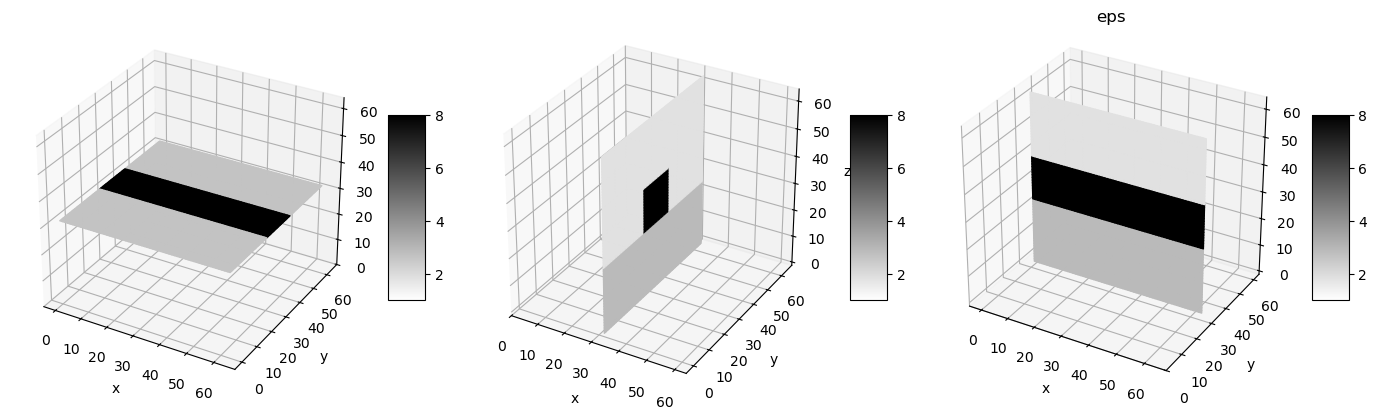

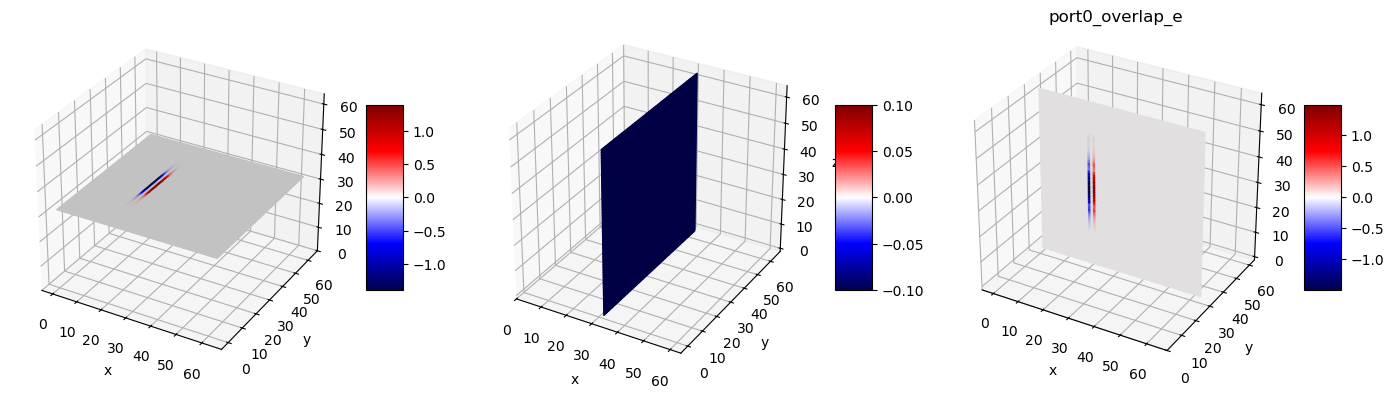

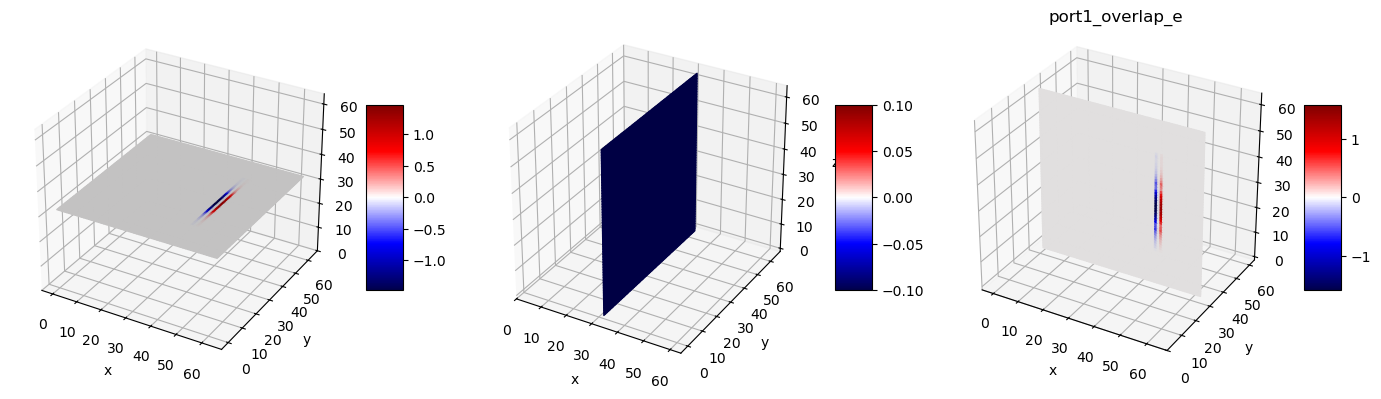

In [38]:
fig1 = plot_3slices(eps, fname=None, my_cmap=plt.cm.binary, cm_zero_center=False, title="eps")
fig2 = plot_3slices(_ports[0].overlap_e(wl)[...,-1].real, fname=None, my_cmap=plt.cm.seismic, cm_zero_center=True, title="port0_overlap_e")
fig3 = plot_3slices(_ports[1].overlap_e(wl)[...,-1].real, fname=None, my_cmap=plt.cm.seismic, cm_zero_center=True, title="port1_overlap_e")

In [34]:
_ports[0].overlap_e(wl).shape

(64, 64, 64, 3)